# Outlier Treatment

Outlier is something which is separate/different from the crowd.

The outliers can be a result of a mistake during data collection or it can be just an indication of variance in your data.

### How would you decide if they are important or not?

Well, it is pretty simple if they are the result of a mistake, then we can ignore them, but if it is just a variance in the data we would need think a bit further. 

### Finding Outliers

1. Univariate method: This method looks for data points with extreme values on one variable. (Boxplot , IQR)
2. Bivariate method: Here we look for unusual combinations on all the variables.(Scatterplot)
3. Multivariate method: Here we look for unusual combinations on multiple variables.
    1. Unsupervised:  DBScan
4. PyOD library for outlier detection algorithm.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df = df[['Item_Outlet_Sales','Item_Visibility','Item_MRP']]

In [5]:
df.shape

(8523, 3)

### Univariate Method

#### Box Plot
Boxplots are a measure of how well distributed the data in a data set is. It divides the data set into three quartiles.

C:\Users\divya\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


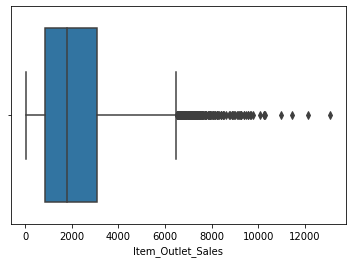

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.boxplot(x=df['Item_Outlet_Sales'])

#### Z score

zscore(arr, axis=0, ddof=0) function computes the relative Z-score of the input data, relative to the sample mean and standard deviation. 
The formula for calculating a z-score is is z = (x-μ)/σ, where x is the raw score, μ is the population mean, and σ is the population standard deviation. 

In [7]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

[[0.910601   0.97073217 1.74745381]
 [1.01844035 0.90811123 1.48902325]
 [0.04923754 0.95691733 0.01004021]
 ...
 [0.57909963 0.59978449 0.89720755]
 [0.19672492 1.53287976 0.60797692]
 [0.82959407 0.41193591 1.05226104]]


In [8]:
threshold = 3
print(np.where(z > 3))

(array([  49,   83,  108,  130,  145,  174,  276,  304,  333,  373,  434,
        456,  472,  502,  521,  532,  661,  694,  753,  809,  854,  935,
        991,  997, 1009, 1138, 1159, 1254, 1272, 1291, 1311, 1324, 1434,
       1450, 1496, 1501, 1506, 1560, 1575, 1644, 1651, 1805, 1827, 1841,
       1859, 1998, 2088, 2109, 2122, 2216, 2238, 2251, 2293, 2324, 2439,
       2445, 2516, 2535, 2586, 2613, 2728, 2776, 2855, 2895, 3017, 3083,
       3087, 3098, 3154, 3206, 3234, 3286, 3399, 3407, 3458, 3474, 3488,
       3497, 3540, 3667, 3709, 3720, 3750, 3757, 3767, 3884, 3993, 4006,
       4219, 4289, 4346, 4349, 4382, 4408, 4530, 4656, 4674, 4676, 4681,
       4772, 4789, 4888, 4941, 4961, 4991, 5031, 5065, 5150, 5177, 5185,
       5223, 5287, 5315, 5374, 5500, 5550, 5619, 5732, 5734, 5752, 5795,
       5799, 5812, 5837, 5880, 5891, 5946, 5977, 6000, 6008, 6012, 6134,
       6179, 6334, 6409, 6536, 6537, 6541, 6576, 6606, 6622, 6674, 6786,
       6886, 6903, 6993, 7005, 7016, 7076, 7088, 7

In [9]:
print(z[6334][0])

3.3414115990376363


#### IQR 

The interquartile range (IQR) is the difference between the 75th and 25th percentile of the data.

In [10]:
df_o = df[(z < 3).all(axis=1)]

In [11]:
df.shape

(8523, 3)

In [12]:
df_o.shape

(8338, 3)

In [13]:
df_o1 = df

In [14]:
# def remove_outlier(df_in, col_name):
#     q1 = df_in[col_name].quantile(0.25)
#     q3 = df_in[col_name].quantile(0.75)
#     iqr = q3-q1 #Interquartile range
#     fence_low  = q1-1.5*iqr
#     fence_high = q3+1.5*iqr
#     df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
#     return df_out

In [15]:
Q1 = df_o1.quantile(0.25)
Q3 = df_o1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df_out = df_o1[~((df_o1 < (Q1 - 1.5 * IQR)) |(df_o1 > (Q3 + 1.5 * IQR))).any(axis=1)]

Item_Outlet_Sales    2267.049000
Item_Visibility         0.067596
Item_MRP               91.817200
dtype: float64


In [16]:
df_out.shape

(8193, 3)

### Bivariate Method

#### Scatter Plot

A scatter plot is a type of plot that shows the data as a collection of points. The position of a point depends on its two-dimensional value, where each value is a position on either the horizontal or vertical dimension.

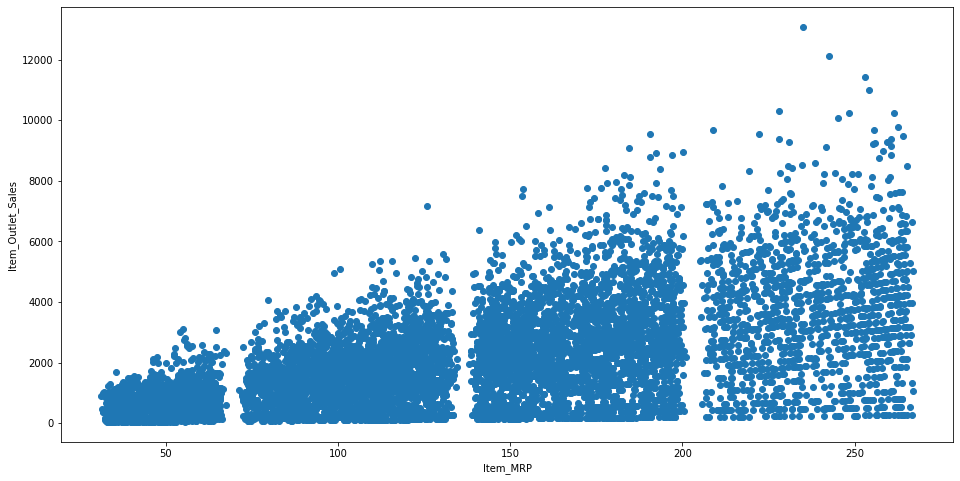

In [17]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Item_MRP'], df['Item_Outlet_Sales'])
ax.set_xlabel('Item_MRP')
ax.set_ylabel('Item_Outlet_Sales')
plt.show()

### Multivariate Method

#### DBSCAN  (Unsupervised method)
Density-Based Spatial Clustering of Applications with Noise is a clustering algorithm commonly used for outlier detection. Here, a data instance is considered as outlier, if it does not belong to any cluster.

“DBSCAN algorithm requires 2 parameters — epsilon, which specifies how close points should be to each other to be considered a part of a cluster; and minPts, which specifies how many neighbors a point should have to be included into a cluster.” — alitouka

In [18]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)

In [20]:
df_scaled

,Item_Outlet_Sales,Item_Visibility,Item_MRP
0,0.283587,0.048866,0.927507
1,0.031419,0.058705,0.072068
2,0.158115,0.051037,0.468288
3,0.053555,0.000000,0.640093
4,0.073651,0.000000,0.095805
...,...,...,...
8518,0.210293,0.172914,0.777729
8519,0.039529,0.143069,0.326263
8520,0.088850,0.107148,0.228492
8521,0.138835,0.442219,0.304939


In [21]:
outlier_detection = DBSCAN(
 eps = .2, 
 metric="euclidean", 
 min_samples = 10,
 n_jobs = -1)
clusters = outlier_detection.fit_predict(df_scaled)

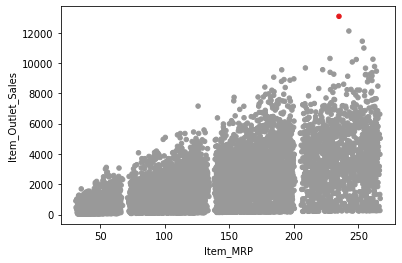

In [22]:
cmap = plt.get_cmap('Set1')
df.plot.scatter(x=
                    'Item_MRP',y='Item_Outlet_Sales', c=clusters, cmap=cmap,
 colorbar = False)

### Supervised Method

#### !pip install pyod
#### !pip install --upgrade pyod  # to make sure that the latest version is installed!

PyOD is a scalable Python toolkit for detecting outliers in multivariate data. It provides access to around 20 outlier detection algorithms under a single  <a href="https://pyod.readthedocs.io/en/latest/" target="_blank">well-documented</a>  API.

**Angle-Based Outlier Detection (ABOD)**

It considers the relationship between each point and its neighbor(s). It does not consider the relationships among these neighbors. The variance of its weighted cosine scores to all neighbors could be viewed as the outlying score
ABOD performs well on multi-dimensional data
PyOD provides two different versions of ABOD:
Fast ABOD: Uses k-nearest neighbors to approximate
Original ABOD: Considers all training points with high-time complexity
 

**k-Nearest Neighbors Detector**

For any data point, the distance to its kth nearest neighbor could be viewed as the outlying score
PyOD supports three kNN detectors:
Largest: Uses the distance of the kth neighbor as the outlier score
Mean: Uses the average of all k neighbors as the outlier score
Median: Uses the median of the distance to k neighbors as the outlier score
 

**Isolation Forest**

It uses the scikit-learn library internally. In this method, data partitioning is done using a set of trees. Isolation Forest provides an anomaly score looking at how isolated the point is in the structure. The anomaly score is then used to identify outliers from normal observations
Isolation Forest performs well on multi-dimensional data
 

**Histogram-based Outlier Detection**

It is an efficient unsupervised method which assumes the feature independence and calculates the outlier score by building histograms
It is much faster than multivariate approaches, but at the cost of less precision
 

**Local Correlation Integral (LOCI)**

LOCI is very effective for detecting outliers and groups of outliers. It provides a LOCI plot for each point which summarizes a lot of the information about the data in the area around the point, determining clusters, micro-clusters, their diameters, and their inter-cluster distances
None of the existing outlier-detection methods can match this feature because they output only a single number for each point
 

**Feature Bagging**

A feature bagging detector fits a number of base detectors on various sub-samples of the dataset. It uses averaging or other combination methods to improve the prediction accuracy
By default, Local Outlier Factor (LOF) is used as the base estimator. However, any estimator could be used as the base estimator, such as kNN and ABOD
Feature bagging first constructs n sub-samples by randomly selecting a subset of features. This brings out the diversity of base estimators. Finally, the prediction score is generated by averaging or taking the maximum of all base detectors
 

**Clustering Based Local Outlier Factor**

It classifies the data into small clusters and large clusters. The anomaly score is then calculated based on the size of the cluster the point belongs to, as well as the distance to the nearest large cluster

In [32]:
# Import models
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF


import matplotlib.font_manager

In [28]:
df= df_scaled

In [29]:
X1 = df['Item_MRP'].values.reshape(-1,1)
X2 = df['Item_Outlet_Sales'].values.reshape(-1,1)

X = np.concatenate((X1,X2),axis=1)

In [30]:
random_state = np.random.RandomState(1)
outliers_fraction = 0.05
# Define seven outlier detection tools to be compared
classifiers = {
        'Angle-based Outlier Detector (ABOD)': ABOD(contamination=outliers_fraction),
        'Cluster-based Local Outlier Factor (CBLOF)':CBLOF(contamination=outliers_fraction,check_estimator=False, random_state=random_state),
        'Feature Bagging':FeatureBagging(LOF(n_neighbors=35),contamination=outliers_fraction,check_estimator=False,random_state=random_state),
        'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
        'Isolation Forest': IForest(contamination=outliers_fraction,random_state=random_state),
        'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction),
        'Average KNN': KNN(method='mean',contamination=outliers_fraction)
}

OUTLIERS :  447 INLIERS :  8076 Angle-based Outlier Detector (ABOD)


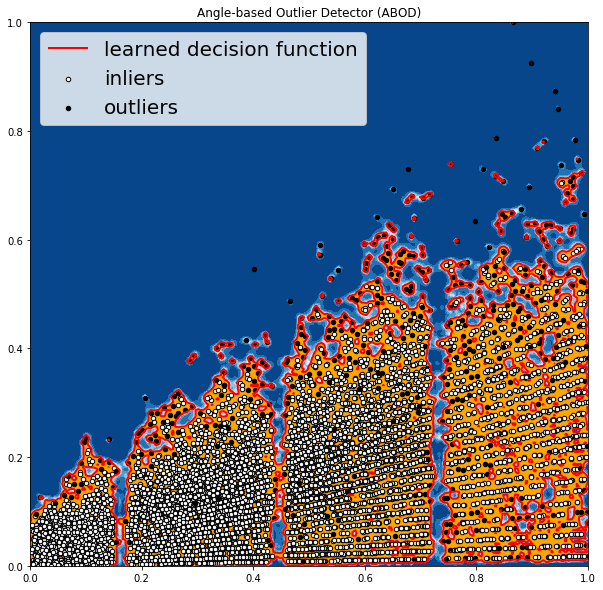

OUTLIERS :  427 INLIERS :  8096 Cluster-based Local Outlier Factor (CBLOF)


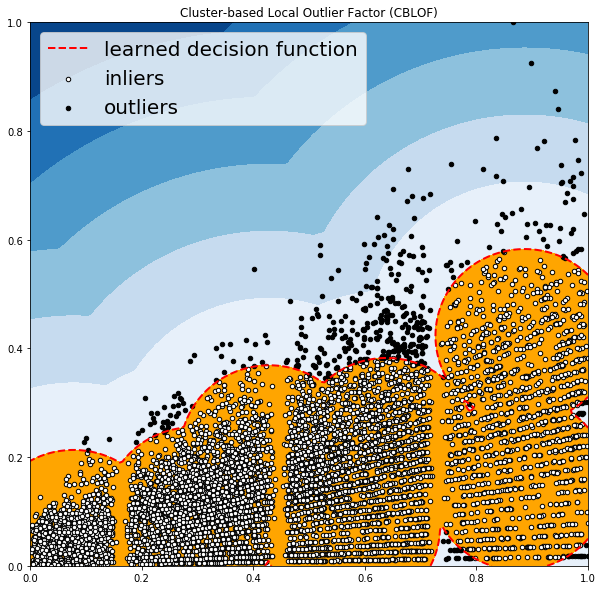

OUTLIERS :  393 INLIERS :  8130 Feature Bagging


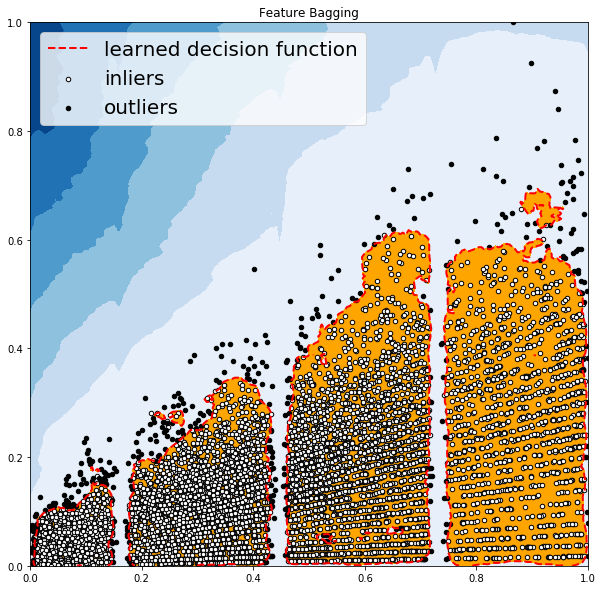

OUTLIERS :  501 INLIERS :  8022 Histogram-base Outlier Detection (HBOS)


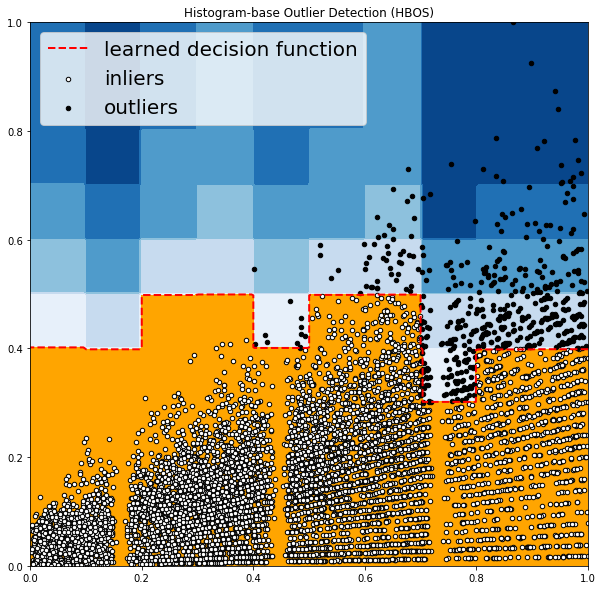

C:\Users\divya\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


OUTLIERS :  427 INLIERS :  8096 Isolation Forest


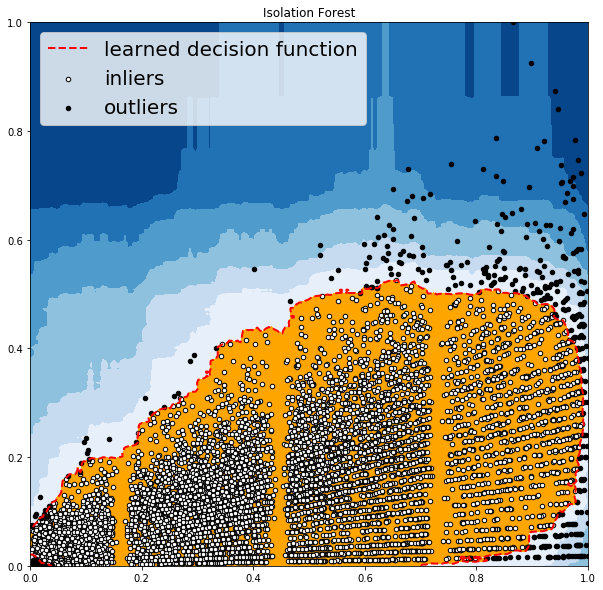

OUTLIERS :  311 INLIERS :  8212 K Nearest Neighbors (KNN)


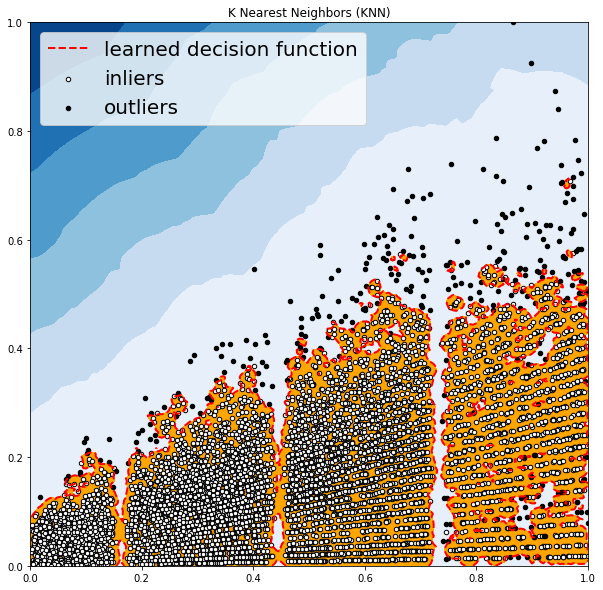

OUTLIERS :  176 INLIERS :  8347 Average KNN


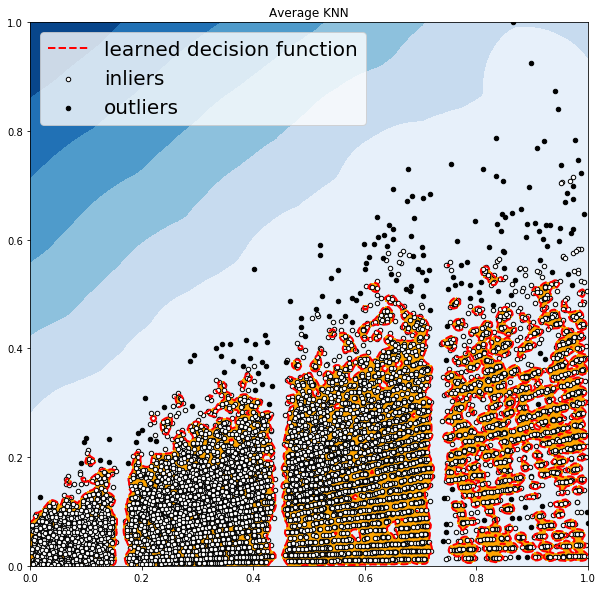

In [33]:
xx , yy = np.meshgrid(np.linspace(0,1 , 200), np.linspace(0, 1, 200))

for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X)
    # predict raw anomaly score
    scores_pred = clf.decision_function(X) * -1
        
    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
    plt.figure(figsize=(10, 10))
    
    # copy of dataframe
    dfx = df
    dfx['outlier'] = y_pred.tolist()
    
    # IX1 - inlier feature 1,  IX2 - inlier feature 2
    IX1 =  np.array(dfx['Item_MRP'][dfx['outlier'] == 0]).reshape(-1,1)
    IX2 =  np.array(dfx['Item_Outlet_Sales'][dfx['outlier'] == 0]).reshape(-1,1)
    
    # OX1 - outlier feature 1, OX2 - outlier feature 2
    OX1 =  dfx['Item_MRP'][dfx['outlier'] == 1].values.reshape(-1,1)
    OX2 =  dfx['Item_Outlet_Sales'][dfx['outlier'] == 1].values.reshape(-1,1)
         
    print('OUTLIERS : ',n_outliers,'INLIERS : ',n_inliers, clf_name)
        
    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)
        
    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)
          
    # fill blue map colormap from minimum anomaly score to threshold value
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        
    # draw red contour line where anomaly score is equal to thresold
    a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
        
    b = plt.scatter(IX1,IX2, c='white',s=20, edgecolor='k')
    
    c = plt.scatter(OX1,OX2, c='black',s=20, edgecolor='k')
       
    plt.axis('tight')  
    
    # loc=2 is used for the top left corner 
    plt.legend(
        [a.collections[0], b,c],
        ['learned decision function', 'inliers','outliers'],
        prop=matplotlib.font_manager.FontProperties(size=20),
        loc=2)
      
    plt.xlim((0, 1))
    plt.ylim((0, 1))
    plt.title(clf_name)
    plt.show()